<a href="https://colab.research.google.com/github/YOUSSEFBT369/Data-science/blob/main/tpVisualisationdesdonn%C3%A9es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/TP_1.csv')

In [ ]:
df.head(10)

,Timestamp,SourceIP,AttackType,TargetIP,AttackDurationHours
0,2023-01-04 02:00:00,101.237.18.135,DDoS,56.151.20.145,6.545913
1,2023-01-02 05:00:00,13.2.114.130,Malware,239.110.38.24,19.305501
2,2023-01-02 18:00:00,152.233.21.95,Phishing,16.44.123.143,14.675355
3,2023-01-01 01:00:00,171.82.89.172,Malware,237.57.225.215,11.492876
4,2023-01-02 07:00:00,75.135.27.7,Phishing,43.81.255.79,21.218443
5,2023-01-02 09:00:00,115.132.75.69,Phishing,34.103.20.105,9.047682
6,2023-01-03 05:00:00,99.69.4.133,DDoS,181.168.237.231,1.009749
7,2023-01-03 11:00:00,14.182.42.116,Malware,80.196.169.12,13.190158
8,2023-01-02 04:00:00,251.11.7.167,DDoS,45.220.66.66,15.953732
9,2023-01-04 16:00:00,136.88.238.253,Phishing,13.237.239.165,12.347218


2: Dècrivez les

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            500 non-null    object 
 1   SourceIP             500 non-null    object 
 2   AttackType           500 non-null    object 
 3   TargetIP             500 non-null    object 
 4   AttackDurationHours  500 non-null    float64
dtypes: float64(1), object(4)
memory usage: 19.7+ KB


In [ ]:
df.dtypes

,0
Timestamp,object
SourceIP,object
AttackType,object
TargetIP,object
AttackDurationHours,float64


3/ are the data numerical or categorical ?

In [ ]:
colonnes_numeriques = df.select_dtypes(include=['number'])
print("colonnes numèrique :")
print(colonnes_numeriques)

colonnes numèrique :
     AttackDurationHours
0               6.545913
1              19.305501
2              14.675355
3              11.492876
4              21.218443
..                   ...
495            14.065184
496             8.542786
497             7.493665
498             9.737478
499            19.630705

[500 rows x 1 columns]


In [ ]:
colonnes_catégorielles = df.select_dtypes(include=['object'])
print("ncolonnes catégorielles :")
print(colonnes_numeriques)

ncolonnes catégorielles :
     AttackDurationHours
0               6.545913
1              19.305501
2              14.675355
3              11.492876
4              21.218443
..                   ...
495            14.065184
496             8.542786
497             7.493665
498             9.737478
499            19.630705

[500 rows x 1 columns]


In [ ]:
import seaborn as sns


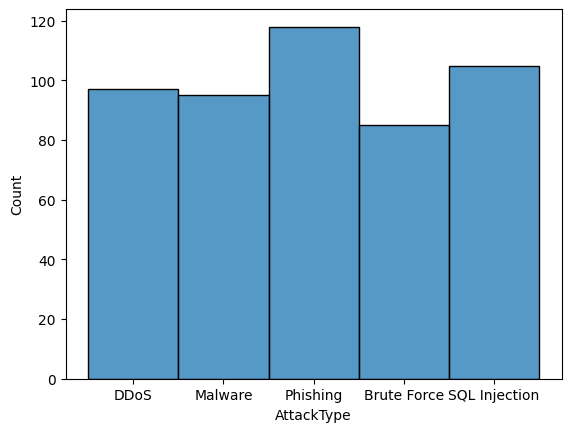

In [ ]:
sns.histplot(df.AttackType);


In [ ]:
nb_att=df['AttackType'].value_counts()
print(nb_att)


AttackType
Phishing         118
SQL Injection    105
DDoS              97
Malware           95
Brute Force       85
Name: count, dtype: int64


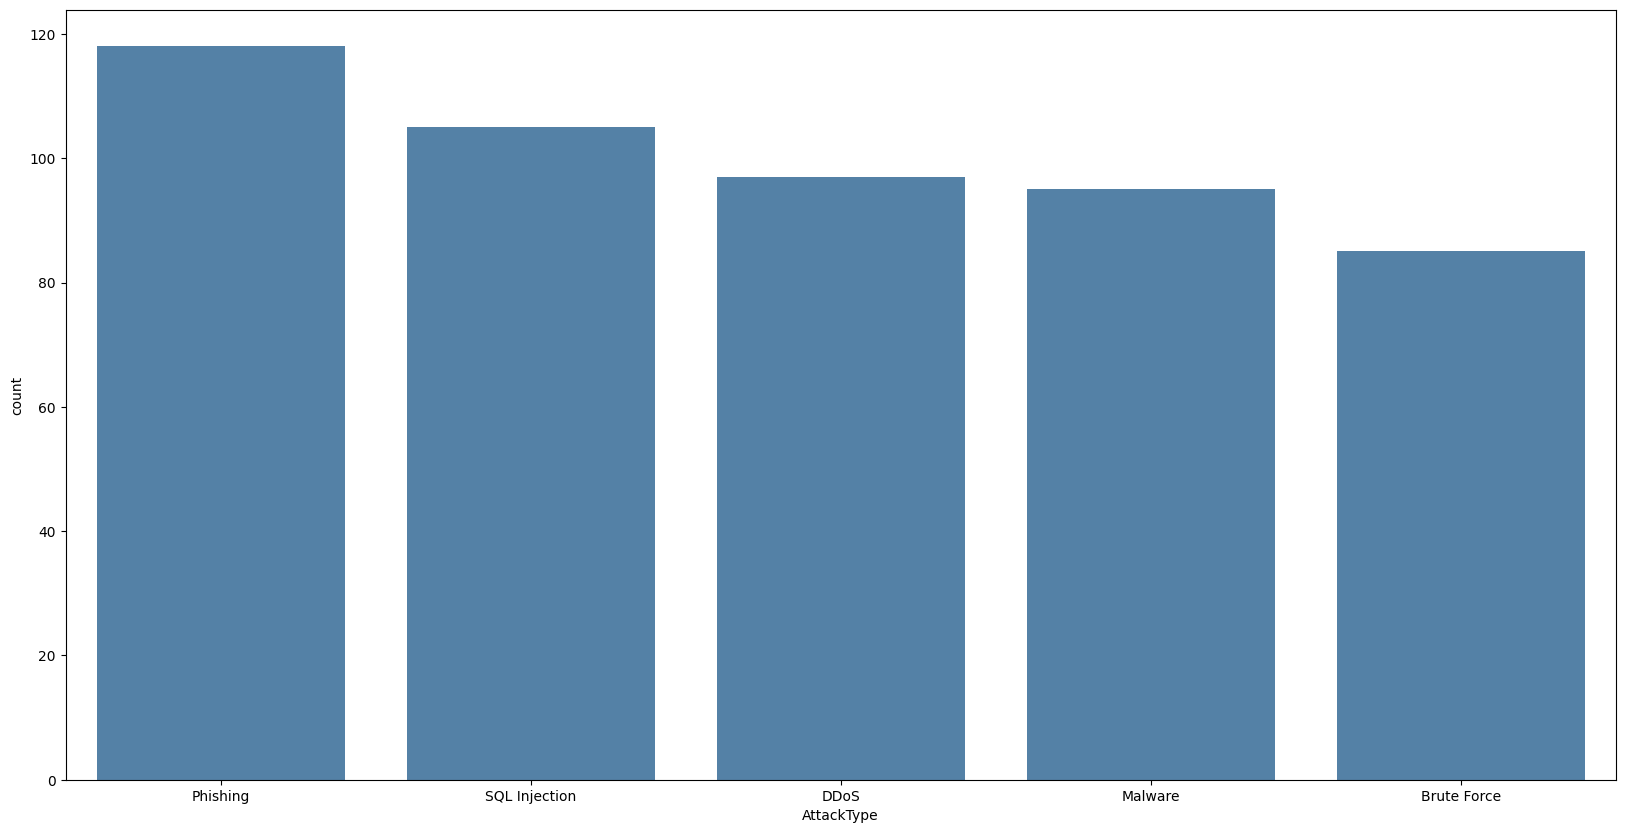

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(data=df, x="AttackType",
              order=df["AttackType"].value_counts().index,
              color='steelblue')

plt.show()


In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.dtypes

,0
Timestamp,datetime64[ns]
SourceIP,object
AttackType,object
TargetIP,object
AttackDurationHours,float64


In [ ]:
df['Hour'] = df['Timestamp'].dt.hour
df.head()

,Timestamp,SourceIP,AttackType,TargetIP,AttackDurationHours,Hour
0,2023-01-04 02:00:00,101.237.18.135,DDoS,56.151.20.145,6.545913,2
1,2023-01-02 05:00:00,13.2.114.130,Malware,239.110.38.24,19.305501,5
2,2023-01-02 18:00:00,152.233.21.95,Phishing,16.44.123.143,14.675355,18
3,2023-01-01 01:00:00,171.82.89.172,Malware,237.57.225.215,11.492876,1
4,2023-01-02 07:00:00,75.135.27.7,Phishing,43.81.255.79,21.218443,7


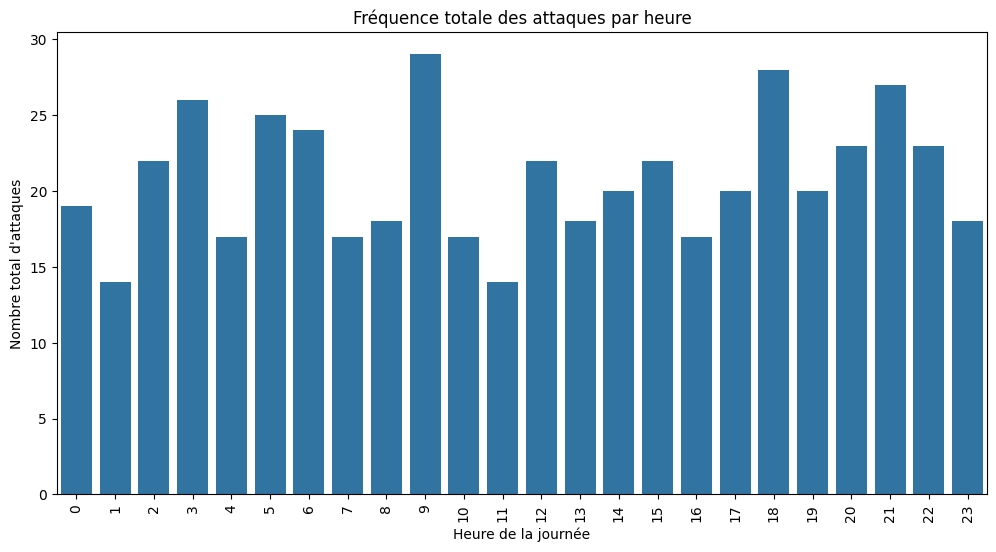

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Hour')
plt.xlabel('Heure de la journée')
plt.ylabel('Nombre total d\'attaques')
plt.title('Fréquence totale des attaques par heure')
plt.xticks(rotation=90)
plt.show()

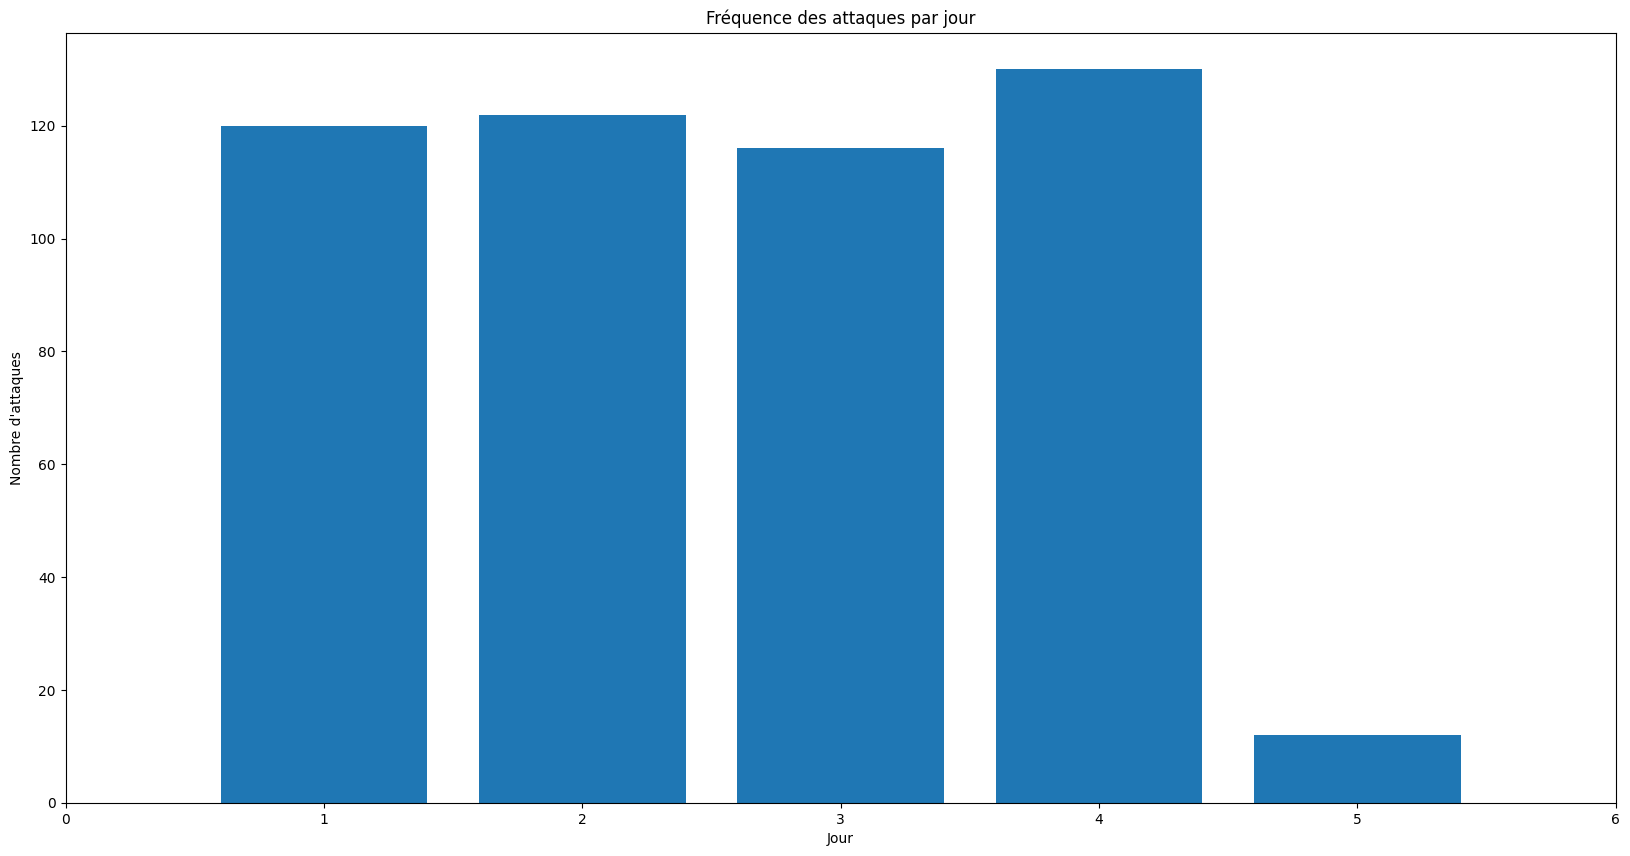

In [ ]:
df['jour'] = df['Timestamp'].dt.day # Extrait l'heure de la colonne de date/heure
attack_count_by_day = df.groupby('jour').size().reset_index(name='attack_count')
plt.figure(figsize=(20,10))
plt.bar(attack_count_by_day['jour'], attack_count_by_day['attack_count'])
plt.xlabel('Jour')
plt.ylabel('Nombre d\'attaques')
plt.title('Fréquence des attaques par jour')
plt.xticks(range(7)) # Assurez-vous que les heures sont correctement étiquetées sur l'axe des x
plt.show()

AttackType
Phishing         3
DDoS             3
Malware          3
Brute Force      2
SQL Injection    1
Name: count, dtype: int64


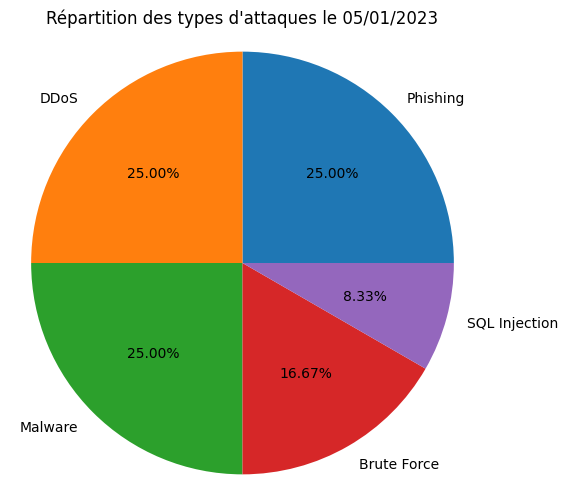

In [ ]:
# Étape 1 : Filtrer les données pour le 05/01/2023
date = pd.to_datetime('2023-01-05')
data_filtered = df[df['Timestamp'].dt.date == date.date()]
# Étape 2 : Regrouper les données par type d'attaque (assumant que la colonne de type d'attaque est appelée 'attack_type')
attack_counts = data_filtered['AttackType'].value_counts()
print(attack_counts)
# Étape 3 : Créer un diagramme circulaire
plt.figure(figsize=(6, 6))
plt.pie(attack_counts, labels=attack_counts.index, autopct='%1.2f%%',startangle=0)
plt.axis('equal') # Assure une échelle égale pour que le cercle soit circulaire
plt.title('Répartition des types d\'attaques le 05/01/2023')
plt.show()

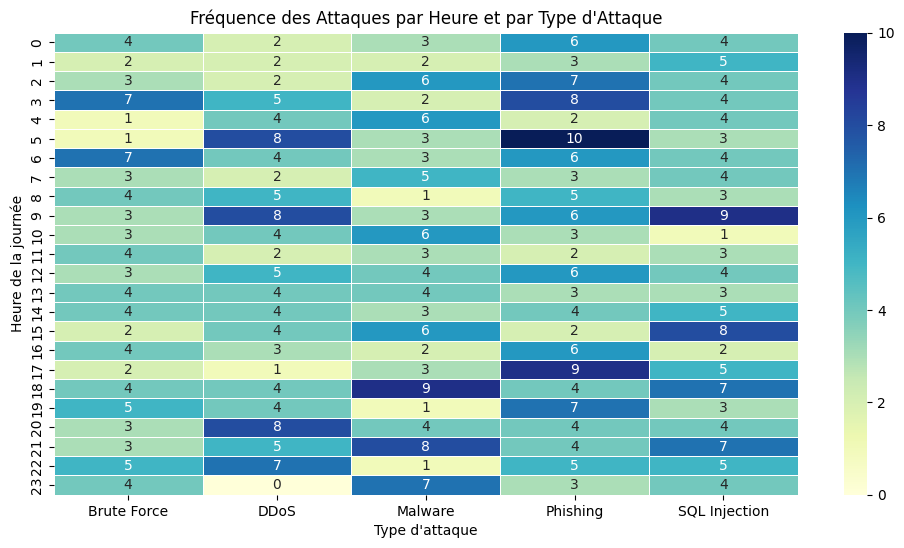

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d %H:%M:%S')
df['Heure'] = df['Timestamp'].dt.hour
heatmap_data = df.pivot_table(index='Heure', columns='AttackType',
                              aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 6))
sns.heatmap(data=heatmap_data, cmap='YlGnBu', annot=True, fmt='d',
            linewidths=0.5, cbar=True)
plt.xlabel('Type d\'attaque')
plt.ylabel('Heure de la journée')
plt.title('Fréquence des Attaques par Heure et par Type d\'Attaque')
plt.show()

SourceIP
37.40.123.76      1
101.237.18.135    1
13.2.114.130      1
152.233.21.95     1
165.171.0.67      1
                 ..
251.11.7.167      1
14.182.42.116     1
99.69.4.133       1
115.132.75.69     1
75.135.27.7       1
Name: count, Length: 500, dtype: int64


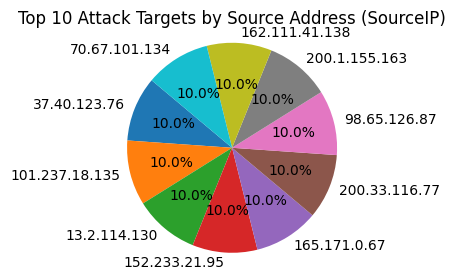

In [ ]:
targetip_counts = df['SourceIP'].value_counts()
print(targetip_counts)
# Select the top 10 target addresses
top_10_targetip = targetip_counts.head(10)
plt.figure(figsize=(5, 3))
plt.pie(top_10_targetip, labels=top_10_targetip.index, autopct='%1.1f%%',startangle=140)
plt.title('Top 10 Attack Targets by Source Address (SourceIP)')
plt.axis('equal')
plt.show()

TargetIP
240.96.160.75      1
56.151.20.145      1
239.110.38.24      1
16.44.123.143      1
193.252.121.67     1
                  ..
45.220.66.66       1
80.196.169.12      1
181.168.237.231    1
34.103.20.105      1
43.81.255.79       1
Name: count, Length: 500, dtype: int64


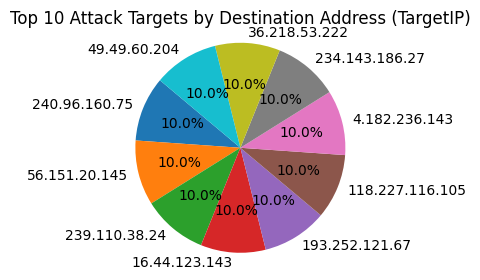

In [ ]:
targetip_counts = df['TargetIP'].value_counts()
print(targetip_counts)
# Select the top 10 target addresses
top_10_targetip = targetip_counts.head(10)
plt.figure(figsize=(5, 3))
plt.pie(top_10_targetip, labels=top_10_targetip.index, autopct='%1.1f%%',startangle=140)
plt.title('Top 10 Attack Targets by Destination Address (TargetIP)')
plt.axis('equal')
plt.show()

Type d attack ['DDoS' 'Malware' 'Phishing' 'Brute Force' 'SQL Injection']


/tmp/ipython-input-1977966506.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=attack_types, patch_artist=True)


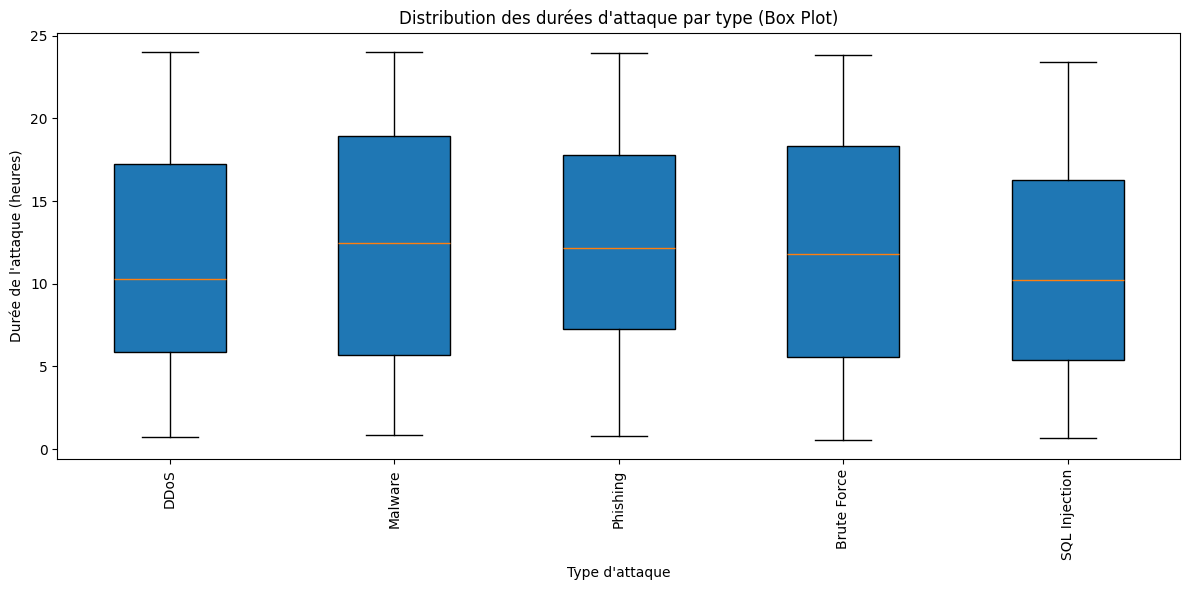

In [ ]:
plt.figure(figsize=(12, 6))
# Obtenir les types d'attaques uniques
attack_types = df['AttackType'].unique()
print('Type d attack',attack_types)
# Préparer les données pour le box plot
box_data = [df[df['AttackType'] == attack_type]['AttackDurationHours']
            for attack_type in attack_types]
# Créer le box plot avec matplotlib
plt.boxplot(box_data, labels=attack_types, patch_artist=True)
# Rotation des étiquettes
plt.xticks(rotation=90)
# Étiquettes et titre
plt.xlabel('Type d\'attaque')
plt.ylabel('Durée de l\'attaque (heures)')
plt.title('Distribution des durées d\'attaque par type (Box Plot)')
plt.tight_layout()
plt.show()

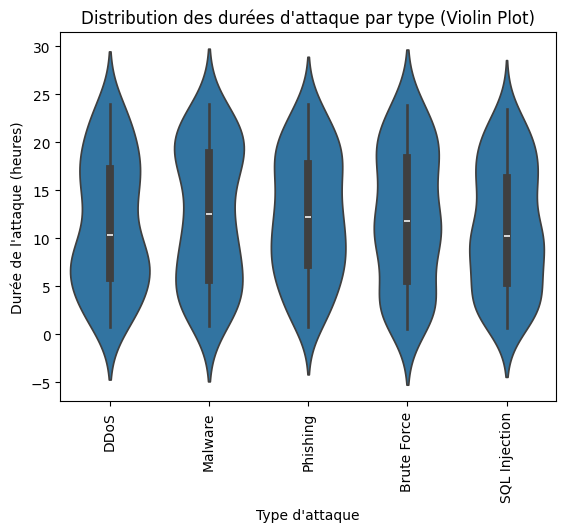

In [ ]:
# Diagramme de violon (Violin Plot)
#plt.subplot(1, 2, 2)
sns.violinplot(data=df, x='AttackType', y='AttackDurationHours')
plt.xticks(rotation=90)
plt.xlabel('Type d\'attaque')
plt.ylabel('Durée de l\'attaque (heures)')
plt.title('Distribution des durées d\'attaque par type (Violin Plot)')
#plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')